## **CIND 820 - Big Data Analytics Project**

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # to scale the numeric data
from sklearn.model_selection import train_test_split # to apply train-test split
from sklearn.linear_model import LogisticRegression # to implement Multinomial Logistic Regression modeling
from sklearn.model_selection import cross_val_score # to apply k-fold cross-validation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # to evaluate the model's performance
from sklearn.metrics import ConfusionMatrixDisplay # to display the confusion matrix

**Create a data frame of the Room Occupancy dataset. Display the names of the columns. Check the data types of the attributes. Run a summary statistics of the dataset.**

In [13]:
# Read the CSV file into a data frame called Occupancy
Occupancy = pd.read_csv('Occupancy_Estimation.csv')

# Display the first five records of the data frame
Occupancy.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [14]:
# Get the column names
print("Column Names:", Occupancy.columns)

Column Names: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [15]:
# Get the data types of each column
print("\nData Types of Each Column:")
print(Occupancy.dtypes)


Data Types of Each Column:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [16]:
# Get the summary statistics
print("Summary Statistics:")
print(Occupancy.describe())

Summary Statistics:
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744  

**Scale the numeric features**

In [19]:
# Create the scaler
scaler = StandardScaler()   # mean = 0 and standard deviation = 1

# Transform the numeric data
X = pd.DataFrame(scaler.fit_transform(Occupancy.iloc[:, 2:16]))

# Add the binary motion data
X['S6_PIR'] = Occupancy['S6_PIR']
X['S7_PIR'] = Occupancy['S7_PIR']

# Add the column names for the features
X.columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
             'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
             'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
             'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

# Define the target variable
y = Occupancy['Room_Occupancy_Count']

In [20]:
X.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
count,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,10129.000000,10129.000000
mean,-3.434512e-15,5.533380e-15,4.781379e-15,-6.779233e-15,8.979116e-17,-1.122390e-17,-4.489558e-17,-1.010151e-16,-2.244779e-17,-5.611948e-17,-8.417922e-17,-1.094330e-16,-8.979116e-17,-3.086571e-17,0.090137,0.079574
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,0.286392,0.270645
min,-1.463033e+00,-1.357775e+00,-1.443193e+00,-2.284195e+00,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-3.415843e-01,-3.004478e-01,-2.855770e-01,-4.461540e-01,-5.794322e-01,-5.400593e+00,0.000000,0.000000
25%,-7.514583e-01,-6.073017e-01,-8.580709e-01,-8.813419e-01,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-3.100080e-01,-2.629229e-01,-2.372230e-01,-3.632881e-01,-5.294209e-01,-3.547318e-02,0.000000,0.000000
50%,-2.106611e-01,-2.832335e-01,-2.729490e-01,-1.157295e-02,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-2.784317e-01,-2.629229e-01,-2.372230e-01,-1.975562e-01,-5.044153e-01,4.146165e-03,0.000000,0.000000
75%,5.009141e-01,1.431719e-01,7.568655e-01,6.898537e-01,-2.635834e-01,-1.785459e-01,2.697274e-01,4.479174e-01,-2.784317e-01,-2.253979e-01,-2.130460e-01,-3.182432e-02,2.070265e-02,4.146165e-03,0.000000,0.000000
max,2.635640e+00,5.891117e+00,2.652660e+00,2.261049e+00,2.735902e+00,3.446966e+00,4.208228e+00,3.100809e+00,1.172055e+01,1.245804e+01,8.490675e+00,2.731394e+01,4.046607e+00,7.713410e+00,1.000000,1.000000


**Split the data into training and testing sets**

In [22]:
# Split the data into features (X) and target(y)
X = Occupancy[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
               'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
               'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
               'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']]

y = Occupancy['Room_Occupancy_Count']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
1937,25.19,25.19,24.63,25.56,0,0,0,0,0.08,0.05,0.06,0.05,360,0.000000,0,0
4477,25.38,25.38,24.81,25.75,0,0,0,0,0.07,0.05,0.06,0.06,365,0.000000,0,0
8550,25.56,25.63,25.31,25.69,0,0,0,0,0.07,0.05,0.05,0.08,530,-2.592308,0,0
1346,25.50,25.50,25.06,25.88,0,0,0,0,0.07,0.04,0.07,0.06,390,-0.642308,0,0
7296,25.38,25.38,24.88,25.75,0,0,0,0,0.07,0.05,0.06,0.10,355,0.000000,0,0


**Use Multinomial Logistic Regression Analysis for modeling**

In [28]:
# Create a Multinomial Logistic Regression classifier
model = LogisticRegression(solver='newton-cg')

**Apply cross validation on the training set**

In [29]:
# Apply cross-validation on the training set
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Evaluation metrics
print(f'Cross-Validation Accuracy Scores on Training Set: {scores}')
print(f'Average Cross-Validation Accuracy on Training Set: {scores.mean()}')

Cross-Validation Accuracy Scores on Training Set: [0.99136868 0.99383477 0.99260173 0.99135802 0.99012346 0.99135802
 0.98765432 0.9962963  0.99382716 0.99012346]
Average Cross-Validation Accuracy on Training Set: 0.9918545919532356


**Train the model on the full training set and evaluate on the test set** 

In [30]:
# Train the model using the training set
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [31]:
# Predict the response using the test set
y_pred = model.predict(X_test)
print(y_pred[:20])

[0 1 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 3 2 0]


In [32]:
# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)          # actual (true) labels vs predicted labels

conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9891411648568608


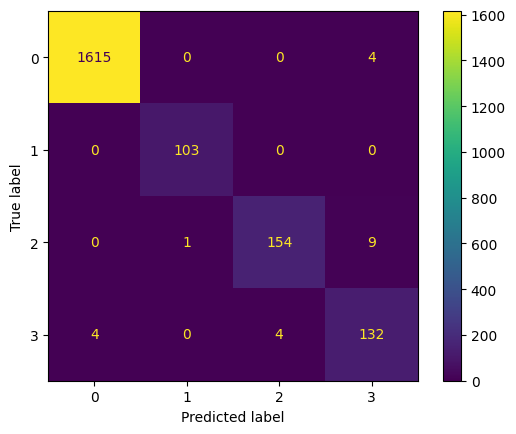

In [33]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

In [34]:
# Calculate the performance metrics on the test set
class_report = classification_report(y_test, y_pred, digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      0.998     0.998     0.998      1619
           1      0.990     1.000     0.995       103
           2      0.975     0.939     0.957       164
           3      0.910     0.943     0.926       140

    accuracy                          0.989      2026
   macro avg      0.968     0.970     0.969      2026
weighted avg      0.989     0.989     0.989      2026



**Rerun the model with PCA components**

In [35]:
# Read the CSV file into a data frame called PCA
PCA = pd.read_csv('pca.csv', usecols=range(1,7)) # Read all columns except the first one

# Display the first five records of the data frame
PCA.head()

,PC1,PC2,PC3,PC4,PC5,Room_Occupancy_Count
0,-0.747489,1.966208,2.015746,0.353232,-0.417983,1
1,-0.214960,2.314639,1.667552,0.913934,0.198856,1
2,-0.524429,1.990135,1.821161,0.653238,-0.137524,1
3,-0.461770,1.947696,1.686074,0.772723,-0.202401,1
4,-0.753101,1.614104,1.930694,0.540605,-0.307056,1


In [36]:
# Define the predictor and target variables
X = PCA.iloc[:, 0:5]
y  = PCA['Room_Occupancy_Count']

X.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.747489,1.966208,2.015746,0.353232,-0.417983
1,-0.214960,2.314639,1.667552,0.913934,0.198856
2,-0.524429,1.990135,1.821161,0.653238,-0.137524
3,-0.461770,1.947696,1.686074,0.772723,-0.202401
4,-0.753101,1.614104,1.930694,0.540605,-0.307056


In [37]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create a Multinomial Logistic Regression classifier
model_pca = LogisticRegression(solver='newton-cg')

In [39]:
# Apply cross-validation on the training set
scores = cross_val_score(model_pca, X_train, y_train, cv=10, scoring='accuracy')

# Evaluation metrics
print(f'Cross-Validation Accuracy Scores on Training Set: {scores}')
print(f'Average Cross-Validation Accuracy on Training Set: {scores.mean()}')

Cross-Validation Accuracy Scores on Training Set: [0.94574599 0.94204686 0.94451295 0.94691358 0.93950617 0.92592593
 0.94074074 0.94691358 0.94567901 0.93580247]
Average Cross-Validation Accuracy on Training Set: 0.9413787276795909


In [40]:
# Train the model using the training set
model_pca.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [41]:
# Predict the response using the test set
y_pred = model_pca.predict(X_test)

In [42]:
# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)          # actual (true) labels vs predicted labels

conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.93928923988154


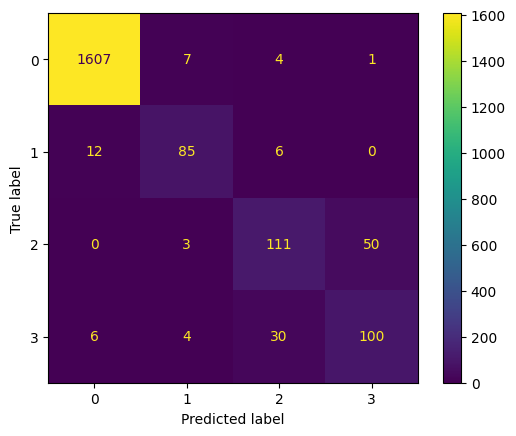

In [43]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

In [44]:
# Calculate the performance metrics on the test set
class_report = classification_report(y_test, y_pred, digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      0.989     0.993     0.991      1619
           1      0.859     0.825     0.842       103
           2      0.735     0.677     0.705       164
           3      0.662     0.714     0.687       140

    accuracy                          0.939      2026
   macro avg      0.811     0.802     0.806      2026
weighted avg      0.939     0.939     0.939      2026

